In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('voitures.csv',sep=',')

In [5]:
data.head()

,Année,Kilométrage,Nb chevaux,Marque,Prix (€)
0,2019,136932,345,Volkswagen,55087.42
1,2018,173266,162,Volkswagen,33088.08
2,2003,196335,226,Mercedes,25564.71
3,2011,69925,368,Renault,53290.58
4,2020,219176,388,Honda,51959.62


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Année        150 non-null    int64  
 1   Kilométrage  150 non-null    int64  
 2   Nb chevaux   150 non-null    int64  
 3   Marque       150 non-null    object 
 4   Prix (€)     150 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 6.0+ KB


In [11]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Année,150.0,2011.220000,7.341040,2000.00,2004.0000,2011.000,2018.0000,2023.00
Kilométrage,150.0,119030.880000,71928.205074,6252.00,58061.0000,113005.500,182982.5000,247855.00
Nb chevaux,150.0,251.360000,93.546907,75.00,173.5000,263.000,330.0000,397.00
Prix (€),150.0,37914.933533,12842.813963,6960.47,28503.1025,38196.745,49236.3025,62794.11


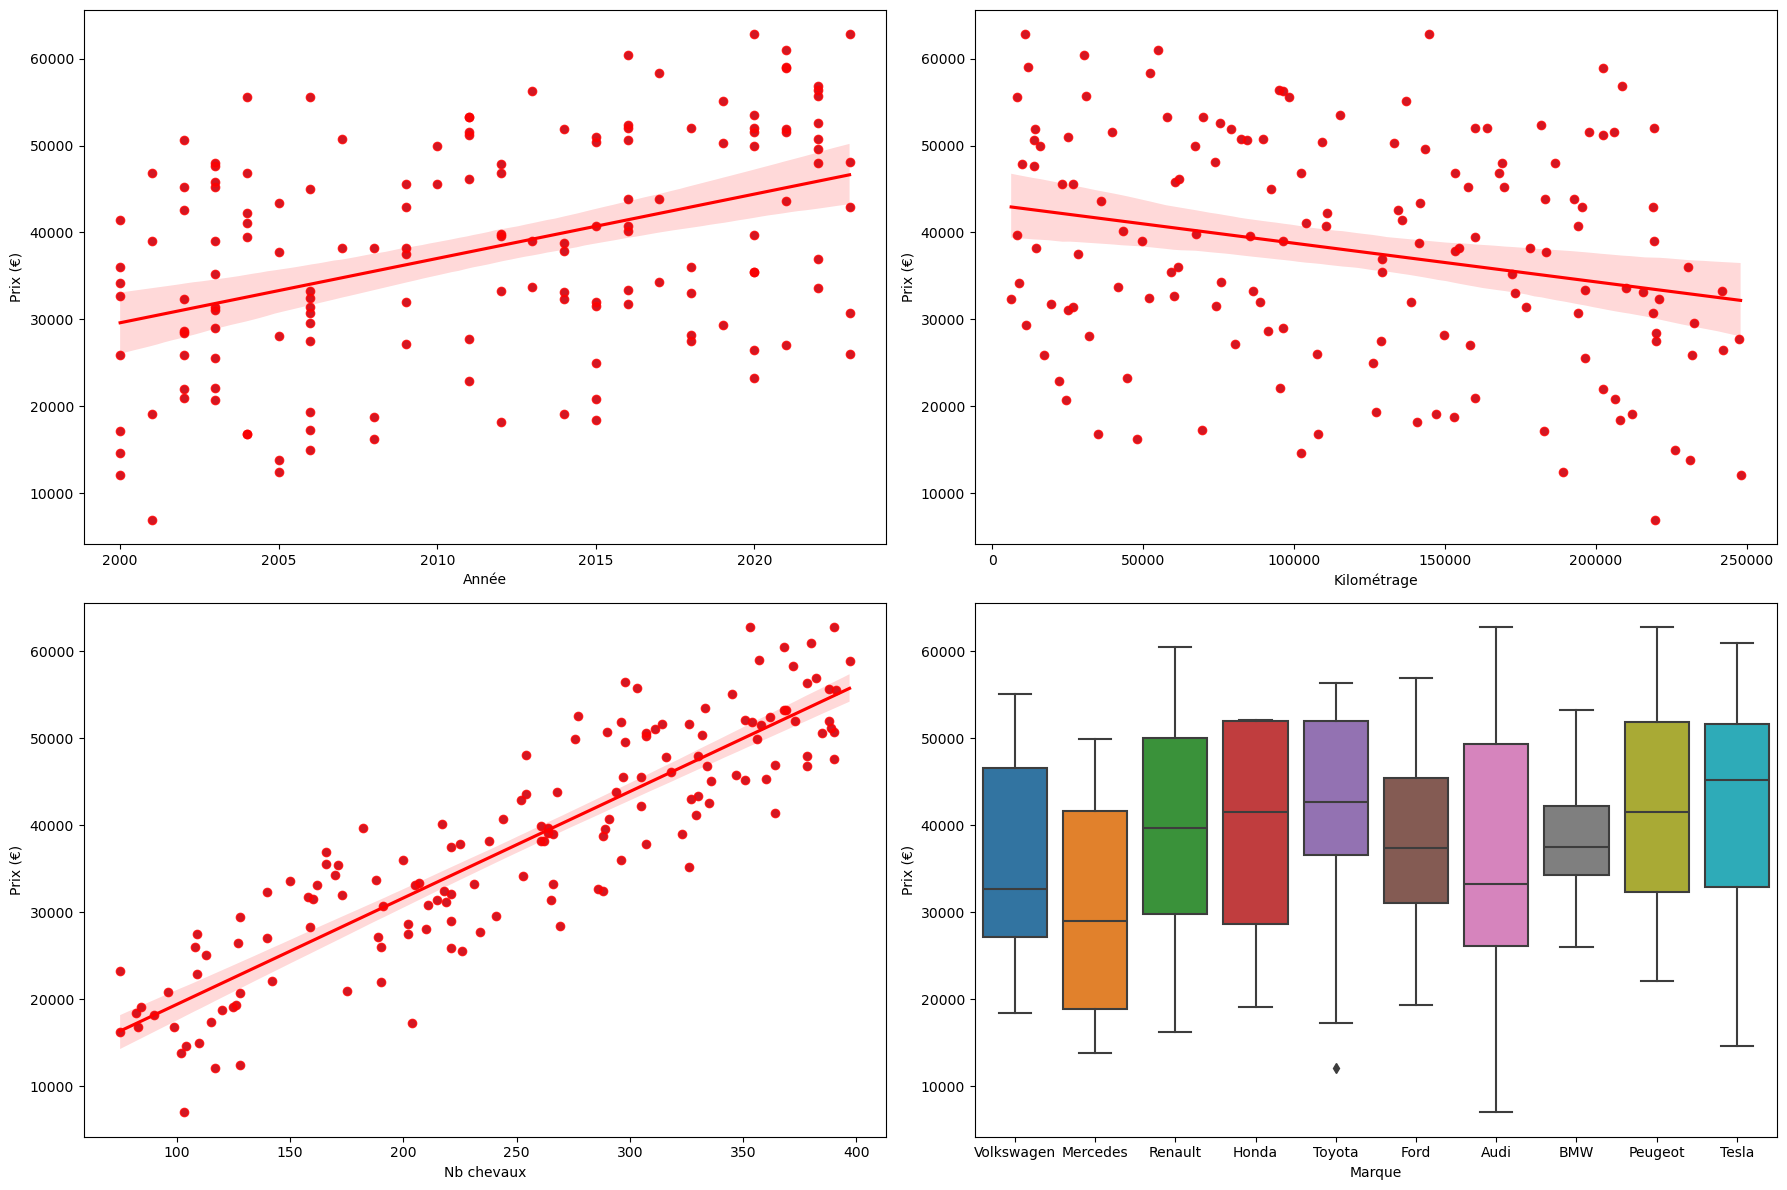

In [63]:
# Liste des variables à visualiser avec Prix (€)
variables = ['Année', 'Kilométrage', 'Nb chevaux', 'Marque']

fig, axes = plt.subplots(2,2,figsize=(18,12))
axes = axes.flatten()

for i , var in enumerate(variables):
    if data[var].dtype == 'object':
        sns.boxplot(x=data[var],y=data['Prix (€)'],ax=axes[i])
        
    else:
        sns.scatterplot(x=data[var],y=data['Prix (€)'],ax=axes[i])
        sns.regplot(x=data[var],y=data['Prix (€)'],ax=axes[i],color='red')

plt.tight_layout()
plt.show()

In [78]:
marque = data['Marque']
marque.unique()
cat_encoder = ['Marque']
df = data

In [86]:
ct = ColumnTransformer(
    [
        (
            'marque_encoder',
            OneHotEncoder(
                handle_unknown = 'ignore',
                sparse = False
            ),cat_encoder
        ),  ("scaler", StandardScaler(), ["Kilométrage", "Nb chevaux"]) 
    ],
    remainder='passthrough'
)

encoder_result = ct.fit_transform(df)

cat_columns_names = ct.named_transformers_['marque_encoder'].get_feature_names_out(cat_encoder)

not_cat_columns = []
for col_name in data.columns:
    if col_name not in cat_encoder:
        not_cat_columns.append(col_name)
not_cat_columns
all_columns_names = list(cat_columns_names) + not_cat_columns
all_columns_names

df_encoder = pd.DataFrame(encoder_result,columns=all_columns_names)
df_encoder

,Marque_Audi,Marque_BMW,Marque_Ford,Marque_Honda,Marque_Mercedes,Marque_Peugeot,Marque_Renault,Marque_Tesla,Marque_Toyota,Marque_Volkswagen,Année,Kilométrage,Nb chevaux,Prix (€)
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2019.0,136932.0,345.0,55087.42
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2018.0,173266.0,162.0,33088.08
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2003.0,196335.0,226.0,25564.71
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2011.0,69925.0,368.0,53290.58
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2020.0,219176.0,388.0,51959.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2002.0,219879.0,269.0,28459.37
146,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2018.0,160026.0,351.0,52058.70
147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2020.0,44749.0,75.0,23271.78
148,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2008.0,152979.0,120.0,18725.58


In [88]:
df_encoder

,Marque_Audi,Marque_BMW,Marque_Ford,Marque_Honda,Marque_Mercedes,Marque_Peugeot,Marque_Renault,Marque_Tesla,Marque_Toyota,Marque_Volkswagen,Année,Kilométrage,Nb chevaux,Prix (€)
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2019.0,136932.0,345.0,55087.42
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2018.0,173266.0,162.0,33088.08
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2003.0,196335.0,226.0,25564.71
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2011.0,69925.0,368.0,53290.58
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2020.0,219176.0,388.0,51959.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2002.0,219879.0,269.0,28459.37
146,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2018.0,160026.0,351.0,52058.70
147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2020.0,44749.0,75.0,23271.78
148,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2008.0,152979.0,120.0,18725.58


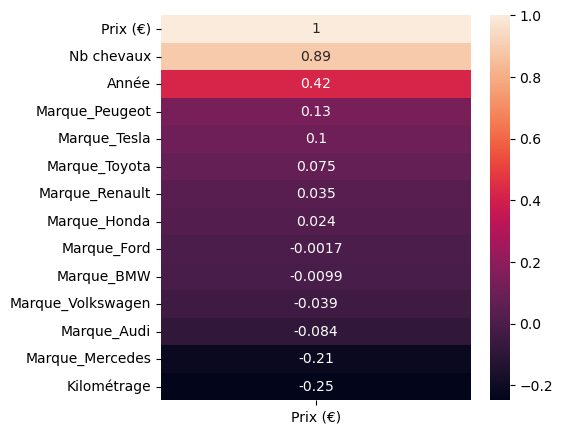

In [103]:
corr_matrix = df_encoder.corr()
heatmap_matrix = corr_matrix[['Prix (€)']].sort_values(by='Prix (€)',ascending=False)
plt.figure(figsize=(5,5))
sns.heatmap(heatmap_matrix,annot=True)
plt.show()

In [107]:
df_encoder.head(2)

,Marque_Audi,Marque_BMW,Marque_Ford,Marque_Honda,Marque_Mercedes,Marque_Peugeot,Marque_Renault,Marque_Tesla,Marque_Toyota,Marque_Volkswagen,Année,Kilométrage,Nb chevaux,Prix (€)
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2019.0,136932.0,345.0,55087.42
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2018.0,173266.0,162.0,33088.08


In [129]:
X = df_encoder.drop('Prix (€)',axis=1)
y = df_encoder['Prix (€)']

In [131]:
print(X.shape)
print(y.shape)

(150, 13)
(150,)


In [133]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [143]:
print(f'taille de X_train : {X_train.shape}, \ntaille de y_train : {y_train.shape},')

taille de X_train : (120, 13), 
taille de y_train : (120,),


In [147]:
print(f'taille de X_test : {X_test.shape}, \ntaille de y_test : {y_test.shape},')

taille de X_test : (30, 13), 
taille de y_test : (30,),


In [149]:
linear_reg = LinearRegression()
linear_reg.fit(X_train,y_train)

LinearRegression()

In [151]:
y_pred = linear_reg.predict(X_test)

In [153]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

In [167]:
print(f"La qualité de l'ajoustement est d'ordre de {np.round(r2*100,2)}%")
print(f"MSE : {np.round(mse)}")
print(f"RMSE : {np.round(rmse)}")
print(f"MAE : {np.round(mae)}")

La qualité de l'ajoustement est d'ordre de 94.92%
MSE : 7760176.0
RMSE : 2786.0
MAE : 2244.0


In [ ]:
Si on augmente le nombre des variables explicatives , est-ce que R2 augmentera?


In [179]:
k = len(all_columns_names)
k
n = X.shape[0]
n

150

In [191]:
R2_ajute = 1-((n-1)*(1-r2))/(n-k-1)
print(f"R2 : { np.round(r2*100,2)}%")
print(f"R2 ajuté : { np.round(R2_ajute*100,2)}%")

R2 : 94.92%
R2 ajuté : 94.39%
